In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('all_bikez_curated.csv')
data.drop_duplicates()
data_backup = data.copy()

data.head()


C:\Users\Daniels\AppData\Local\Temp\ipykernel_10572\2602074168.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('all_bikez_curated.csv')


,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension,Color options
0,acabion,da vinci 650-vi,2011,Prototype / concept model,3.2,NaN,804.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,four-stroke,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,3.5,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,3.1,1300.0,689.0,490.0,In-line four,four-stroke,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Custom made.


In [3]:
# Informações básicas sobre o dataset:

data.info()


print(f'\n Dataset contém {data.shape[0]} linhas e {data.shape[1]} colunas \n ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38472 non-null  object 
 1   Model                38444 non-null  object 
 2   Year                 38472 non-null  int64  
 3   Category             38472 non-null  object 
 4   Rating               21788 non-null  float64
 5   Displacement (ccm)   37461 non-null  float64
 6   Power (hp)           26110 non-null  float64
 7   Torque (Nm)          16634 non-null  float64
 8   Engine cylinder      38461 non-null  object 
 9   Engine stroke        38461 non-null  object 
 10  Gearbox              32675 non-null  object 
 11  Bore (mm)            28689 non-null  float64
 12  Stroke (mm)          28689 non-null  object 
 13  Fuel capacity (lts)  31704 non-null  float64
 14  Fuel system          27844 non-null  object 
 15  Fuel control         22008 non-null 

In [4]:
# Visualizando porcentagem de dados faltantes de cada coluna:

data_fal = (data.isnull().sum()/data.shape[0])*100

print(data_fal[data_fal>0].sort_values(ascending=False))

Torque (Nm)            56.763360
Rating                 43.366604
Fuel control           42.794760
Dry weight (kg)        41.560096
Seat height (mm)       37.143897
Color options          36.766999
Wheelbase (mm)         33.736224
Rear suspension        33.614057
Front suspension       32.140258
Power (hp)             32.132460
Fuel system            27.625286
Bore (mm)              25.428883
Stroke (mm)            25.428883
Fuel capacity (lts)    17.592015
Front tire             16.869412
Rear tire              16.801830
Gearbox                15.068101
Transmission type      14.584633
Cooling system         10.953421
Rear brakes             4.616344
Front brakes            4.114681
Displacement (ccm)      2.627885
Model                   0.072780
Engine cylinder         0.028592
Engine stroke           0.028592
dtype: float64


In [5]:
# Removendo colunas com mais de 35% de dados faltantes:

indx = data_fal[data_fal < 35.0].index

data = data[indx]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38472 non-null  object 
 1   Model                38444 non-null  object 
 2   Year                 38472 non-null  int64  
 3   Category             38472 non-null  object 
 4   Displacement (ccm)   37461 non-null  float64
 5   Power (hp)           26110 non-null  float64
 6   Engine cylinder      38461 non-null  object 
 7   Engine stroke        38461 non-null  object 
 8   Gearbox              32675 non-null  object 
 9   Bore (mm)            28689 non-null  float64
 10  Stroke (mm)          28689 non-null  object 
 11  Fuel capacity (lts)  31704 non-null  float64
 12  Fuel system          27844 non-null  object 
 13  Cooling system       34258 non-null  object 
 14  Transmission type    32861 non-null  object 
 15  Wheelbase (mm)       25493 non-null 

In [6]:
# Obtendo os índices referentes as colunas com variáveis numéricas e categóricas:

data_n = data.select_dtypes(exclude='object')
index_num = data_n.columns

data_c = data.select_dtypes('object')
index_cat = data_c.columns

print(f'Número de variáveis numéricas: {data[index_num].shape[1]} \nNúmero de variáveis categóricas: {data[index_cat].shape[1]}')

Número de variáveis numéricas: 6 
Número de variáveis categóricas: 16


In [7]:
# Estatistica básica de variáveis numéricas: 

data.describe()

,Year,Displacement (ccm),Power (hp),Bore (mm),Fuel capacity (lts),Wheelbase (mm)
count,38472.000000,37461.000000,26110.000000,28689.000000,31704.000000,25493.000000
mean,2003.195883,552.515072,50.776040,72.596713,13.286191,1423.113521
std,20.083372,545.394956,52.082094,18.758621,6.010670,172.645438
min,1894.000000,25.000000,0.300000,1.000000,0.500000,725.000000
25%,2000.000000,125.000000,12.000000,57.000000,8.200000,1321.000000
50%,2010.000000,397.200000,30.000000,73.000000,13.500000,1422.000000
75%,2016.000000,805.000000,77.000000,88.000000,17.500000,1500.000000
max,2022.000000,8277.000000,804.000000,176.000000,64.340000,3327.000000


In [8]:
# Número de valores únicos nas colunas referentes a variáveis categóricas:

print(data[index_cat].nunique().sort_values(ascending=False))

Model                17731
Rear suspension       4652
Front suspension      4315
Fuel system           2910
Front brakes          2040
Rear brakes           1508
Rear tire             1391
Front tire            1191
Brand                  576
Stroke (mm)            540
Engine cylinder         21
Category                18
Gearbox                 16
Engine stroke            9
Cooling system           3
Transmission type        3
dtype: int64


In [9]:
data = data.drop('Model', axis=1)
data = data.drop('Brand', axis=1)

In [10]:
# Escrevendo uma função para substituir os valores faltantes de uma coluna por valores
# presentes na coluna na mesma proporção de ocorrência

def preencher_proporção(col):
    """ Preenche valores ausentes na mesma proporção dos valores presentes

    Recebe uma coluna e retorna a coluna com os valores faltantes preenchidos
    na proporção dos valores existentes."""

    # gerando o dicionário com valores únicos e sua porcentagem:
    por = col.value_counts(normalize=True).to_dict()

    # transformando as chaves e valores do dicionário em uma lista:
    percent = [por[key] for key in por]
    lab = [key for key in por]

    # utilizando as listas para preencher os valores nulos na proporção correta:
    s = pd.Series(np.random.choice(lab, p=percent, size=col.isnull().sum()))
    col = col.fillna(s)

    # verificando se todos os valores ausentes foram preenchidos e
    # preenchendo os que não tiverem sido:
    if len(col.isnull()) > 0:
        col.fillna(value=max(por, key=por.get), inplace=True, axis=0)
    
    return col

In [11]:
# Iterando as colunas do dataframe aplicando a função acima em variáveis categóricas e
# substiuindo valores numéricos faltantes pela mediana:

for col in data.iloc[:,1:].columns.tolist():
    if data[col].dtypes == 'O':
        data[col] = preencher_proporção(data[col])
    else:
        data[col] = data[col].fillna(value=data[col].median(), axis=0)

data.isnull().sum()

Year                   0
Category               0
Displacement (ccm)     0
Power (hp)             0
Engine cylinder        0
Engine stroke          0
Gearbox                0
Bore (mm)              0
Stroke (mm)            0
Fuel capacity (lts)    0
Fuel system            0
Cooling system         0
Transmission type      0
Wheelbase (mm)         0
Front brakes           0
Rear brakes            0
Front tire             0
Rear tire              0
Front suspension       0
Rear suspension        0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 38472 non-null  int64  
 1   Category             38472 non-null  object 
 2   Displacement (ccm)   38472 non-null  float64
 3   Power (hp)           38472 non-null  float64
 4   Engine cylinder      38472 non-null  object 
 5   Engine stroke        38472 non-null  object 
 6   Gearbox              38472 non-null  object 
 7   Bore (mm)            38472 non-null  float64
 8   Stroke (mm)          38472 non-null  object 
 9   Fuel capacity (lts)  38472 non-null  float64
 10  Fuel system          38472 non-null  object 
 11  Cooling system       38472 non-null  object 
 12  Transmission type    38472 non-null  object 
 13  Wheelbase (mm)       38472 non-null  float64
 14  Front brakes         38472 non-null  object 
 15  Rear brakes          38472 non-null 

* Análise exploratória e Feature engeneering

In [13]:
# Inicialmente, vamos abandonar os exemplos classificados como 'Unspecified category '

data = data.drop(data[data['Category'] == 'Unspecified category'].index)

C:\Users\Daniels\AppData\Local\Temp\ipykernel_10572\4263431519.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g1.index, y=g1, palette='mako')


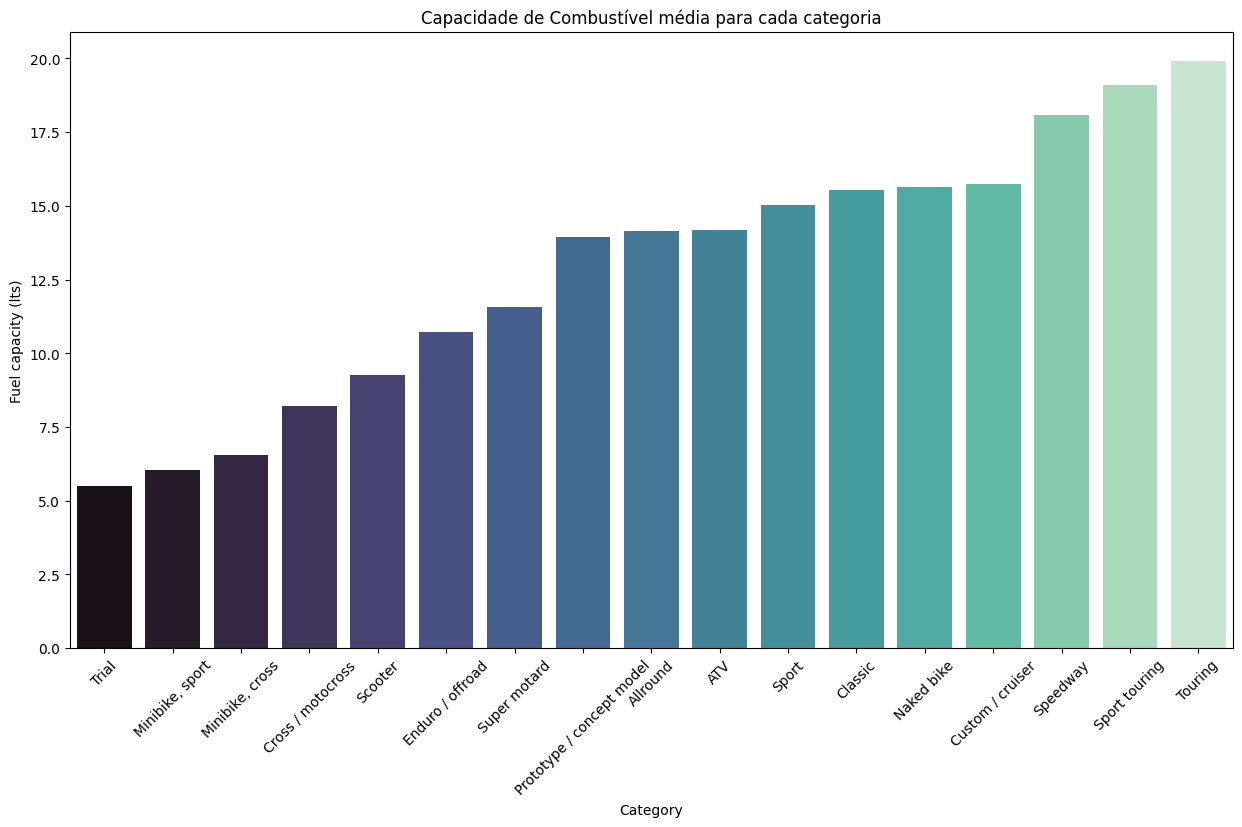

In [14]:
# Visualizando a relação da categoria com a capacidade do tanque:

g1 = data.groupby('Category')['Fuel capacity (lts)'].mean().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=g1.index, y=g1, palette='mako')

plt.title('Capacidade de Combustível média para cada categoria')
plt.xticks(rotation=45) 
plt.show()

é possível notar que as motocicletas voltadas a viagens de longa distância possuem uma maior capacidade de armazenamento de combustível.

C:\Users\Daniels\AppData\Local\Temp\ipykernel_10572\3694374282.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g2.index, y=g2, palette='mako')


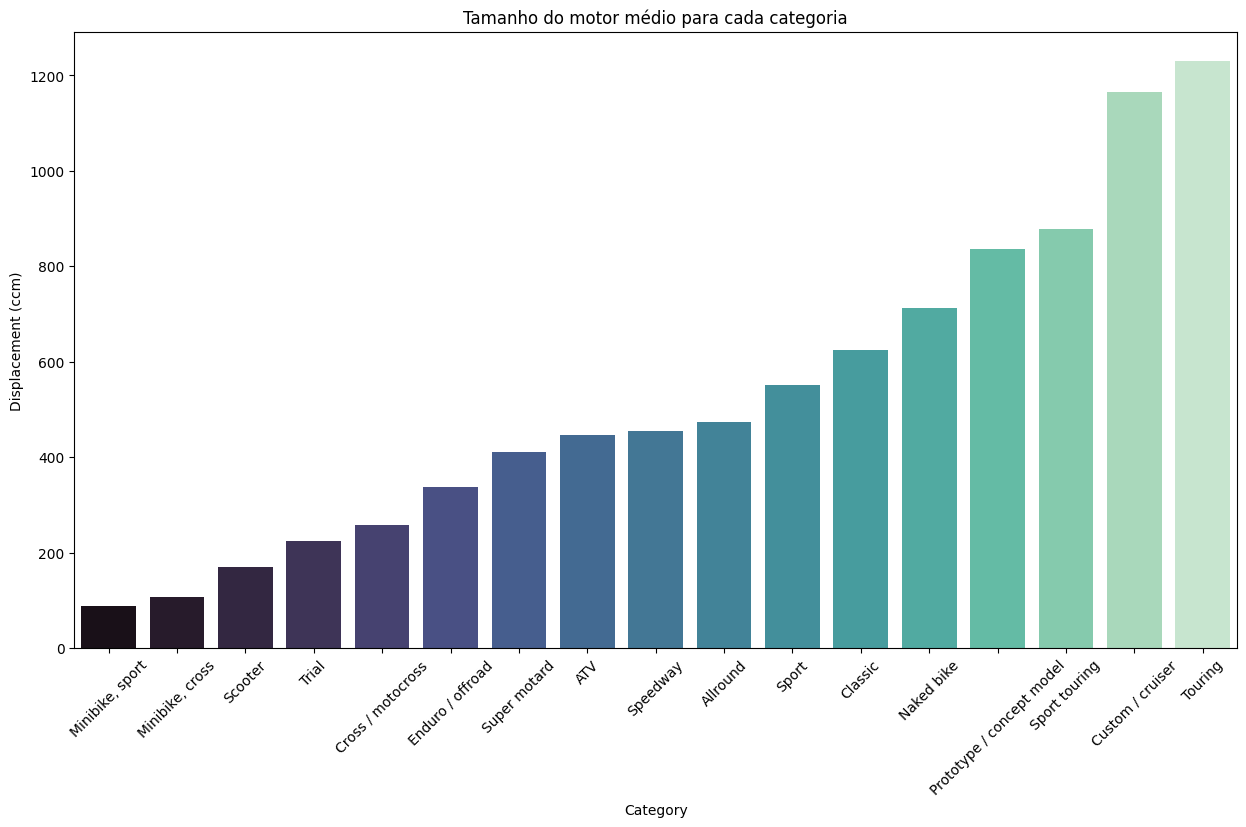

In [15]:
# Visualizando a relação da categoria com o tamanho do motor:

g2 = data.groupby('Category')['Displacement (ccm)'].mean().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=g2.index, y=g2, palette='mako')

plt.title('Tamanho do motor médio para cada categoria')
plt.xticks(rotation=45) 
plt.show()

Motocicletas Touring e Custom tem os maiores tamanhos de motor e as minibikes, como esperado, apresentam os menores valores.

C:\Users\Daniels\AppData\Local\Temp\ipykernel_10572\2413771730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g3.index, y=g3, palette='mako')


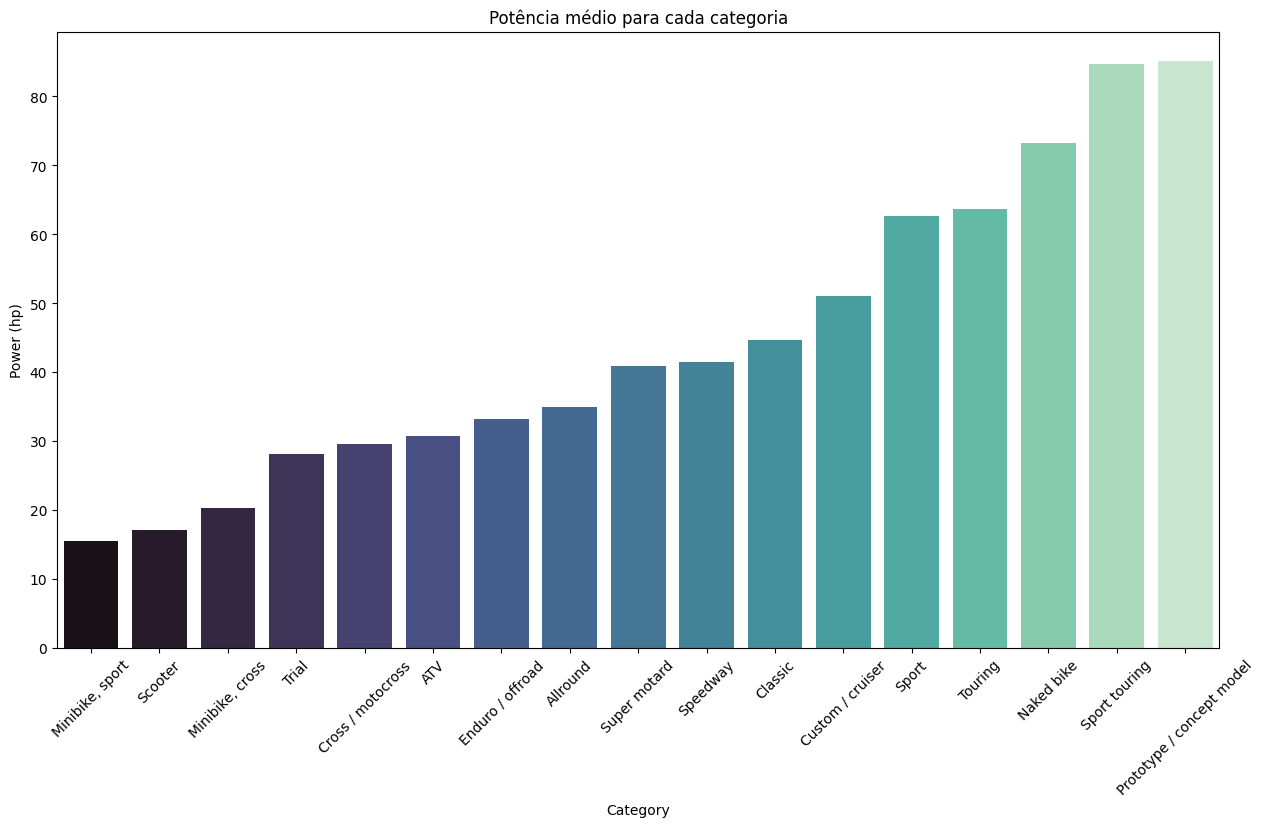

In [16]:
# Visualizando a relação da categoria com a potência:

g3 = data.groupby('Category')['Power (hp)'].mean().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=g3.index, y=g3, palette='mako')

plt.title('Potência médio para cada categoria')
plt.xticks(rotation=45) 
plt.show()

Aqui notamos que as motocicletas protótpos, apesar de em média não apresentarem os maiores motores, geram em média as maiores potências. Em seguida das Sport Touring que em geral apresentam maiores pesos, sendo então necessário uma maior potência para viagens mantendo o carater de pilotagem esportiva.



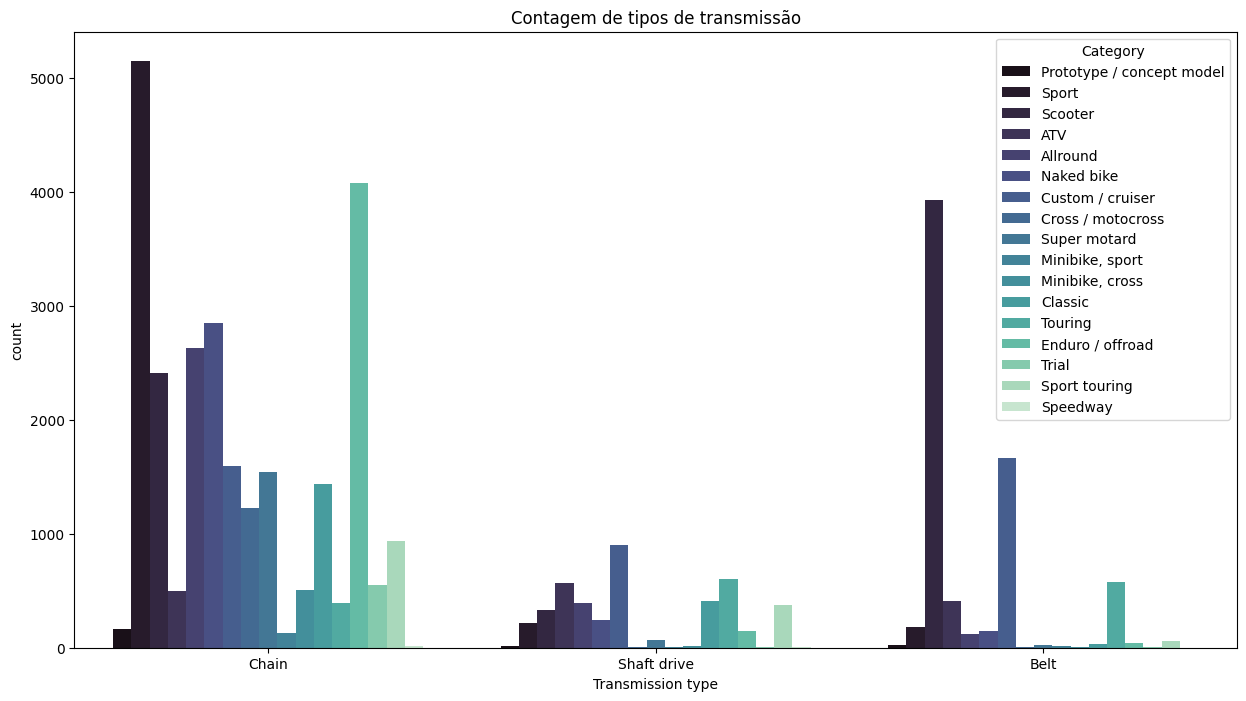

In [17]:
# Visualizando a relação entre a categoria e o tipo de transmissão:

plt.figure(figsize=(15, 8))

sns.countplot(x='Transmission type', hue='Category', data=data, palette='mako')

plt.title('Contagem de tipos de transmissão')
plt.xticks(rotation=0)  
plt.show()

Aqui podemos notar que alguns tipos de transmissão são mais recorrentes para motocicletas de certas categorias como transmissão por corrente com motos esportivas.

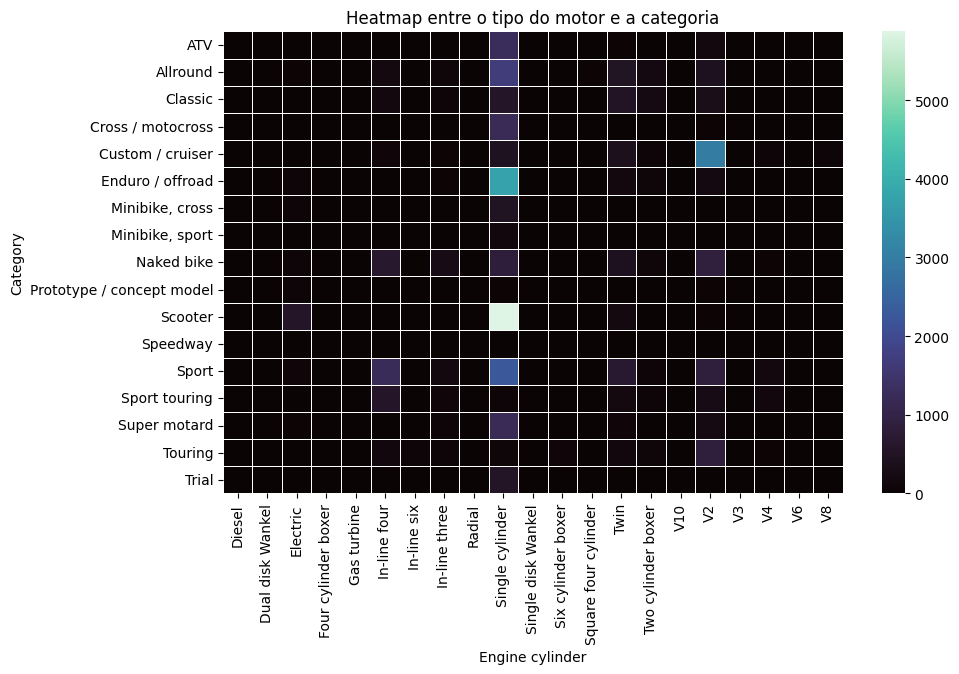

In [18]:
# Visualizando a relação entre a categoria e o tipo de transmissão:

plt.figure(figsize=(10, 6))

heatmap_data = data.groupby(['Category', 'Engine cylinder']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='mako', fmt='d', linewidths=.5)

plt.title('Heatmap entre o tipo do motor e a categoria')

plt.show()

Com o heatmap observamos a relação do tipo de motor com a categoria. Notamos que, por exemplo, motos Enduro e principalmente Scooter são monocilíndicas.

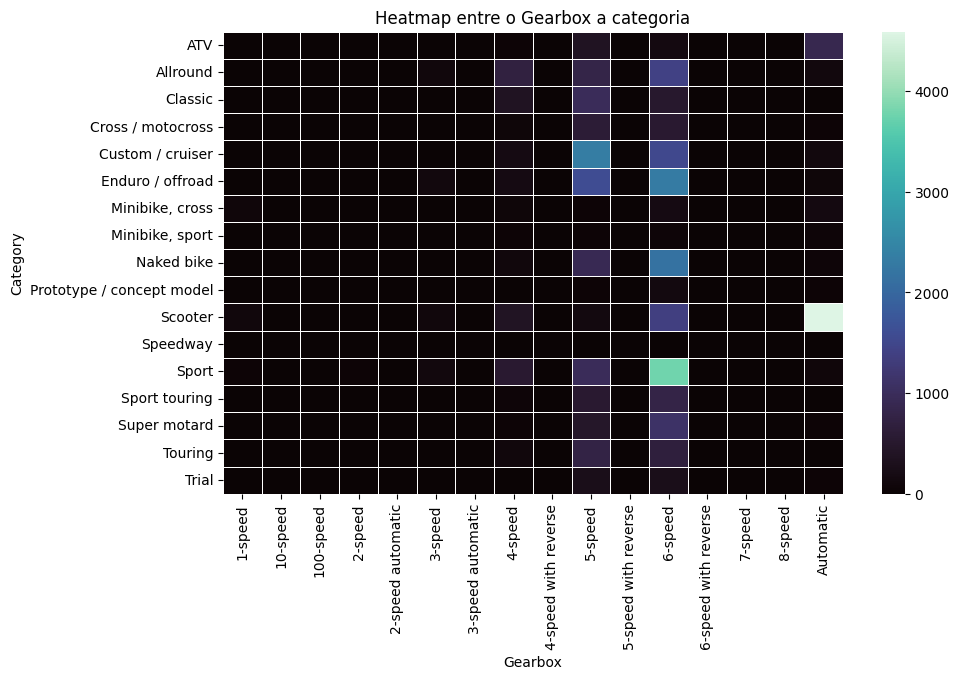

In [19]:
# Visualizando a relação entre a categoria e o tipo de transmissão:

plt.figure(figsize=(10, 6))

heatmap_data2 = data.groupby(['Category', 'Gearbox']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data2, cmap='mako', fmt='d', linewidths=.5)

plt.title('Heatmap entre o Gearbox a categoria')

plt.show()

Com este heatmap podemos notar que as motos esportivas em geral tem 6 marchas e as scooters são automáticas. Os gearbox de 5 e 6 marchas são as mais recoerrentes em diversas categorias.

In [20]:
# Transformando algumas colunas a fim de diminuir a cardinalidade:

data['Fuel system'] = data['Fuel system'].str.split('.').str[0]
data['Front tire'] = data['Front tire'].str.split('-').str[0]
data['Rear tire'] = data['Rear tire'].str.split('-').str[0]
data['Rear brakes'] = data['Rear brakes'].str.split('.').str[0]
data['Front brakes'] = data['Front brakes'].str.split('.').str[0]
data['Category'] = data['Category'].str.split('/').str[0]
data['Category'] = data['Category'].str.split(',').str[0]

In [21]:
# Convertendo a coluna 'Stroke (mm)' para valores numéricos:

data['Stroke (mm)'] = pd.to_numeric(data['Stroke (mm)'], errors='coerce')

In [22]:
# Revisitando as variáveis categóricas restantes e suas cardinalidades

data_c = data.select_dtypes('object')
index_cat = data_c.columns

print(data[index_cat].nunique().sort_values())

Fuel system             3
Cooling system          3
Transmission type       3
Engine stroke           9
Front brakes           13
Rear brakes            14
Category               16
Gearbox                16
Engine cylinder        21
Front tire            299
Rear tire             365
Front suspension     4315
Rear suspension      4652
dtype: int64


In [23]:
# Obtendo duas lista com variáveis de cardinalidade menor e maior que 30:

list_low_card = []
list_high_card = []

for i in index_cat:
    if data[i].nunique() < 30:
        list_low_card.append(i)
    else:
        list_high_card.append(i)
print(list_low_card)
print(list_high_card)

['Category', 'Engine cylinder', 'Engine stroke', 'Gearbox', 'Fuel system', 'Cooling system', 'Transmission type', 'Front brakes', 'Rear brakes']
['Front tire', 'Rear tire', 'Front suspension', 'Rear suspension']


* Preparação dos dados:

In [24]:
# Primeiramente transformaremos os dados categóricos:

for j in list_high_card:
    encoder = LabelEncoder().fit(data[j])
    data[j] = encoder.transform(data[j])

list_low_card.remove('Category')

data = pd.get_dummies(data, columns=list_low_card, dtype=int)


In [25]:
data.head()

,Year,Category,Displacement (ccm),Power (hp),Bore (mm),Stroke (mm),Fuel capacity (lts),Wheelbase (mm),Front tire,Rear tire,...,Rear brakes_Double disc,Rear brakes_Drum,Rear brakes_Dual disc,Rear brakes_Expanding brake,Rear brakes_Expanding brake (drum brake),Rear brakes_Expanding break,Rear brakes_Sealed multidisc,Rear brakes_Single disc,"Rear brakes_Single disc, ABS","Rear brakes_Single disc, combined breaking system"
0,2011,Prototype,397.2,804.0,73.0,84.0,13.5,1422.0,119,50,...,0,0,0,0,0,0,0,1,0,0
1,2007,Sport,1300.0,541.0,81.0,63.0,13.5,1422.0,266,277,...,0,0,0,0,0,0,0,1,0,0
2,2011,Prototype,397.2,536.0,73.0,71.0,13.5,1422.0,84,239,...,0,0,0,0,0,0,0,1,0,0
3,2021,Prototype,397.2,536.0,73.0,46.0,13.5,1422.0,43,26,...,0,0,0,0,0,0,0,1,0,0
4,2007,Prototype,1300.0,689.0,81.0,63.0,13.5,1422.0,192,59,...,0,0,0,0,1,0,0,0,0,0


In [26]:
X = data.drop('Category', axis=1)
X['Stroke (mm)'] = X['Stroke (mm)'].fillna(X['Stroke (mm)'].mean())
y = data['Category']

scaler = StandardScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



* Machine Learning:

In [27]:
KNC = cross_validate(KNeighborsClassifier(), X_train, y_train, scoring=['accuracy', 'f1_macro', 'roc_auc_ovr'])
#KNC = KNeighborsClassifier()

OvsR = cross_validate(OneVsRestClassifier(estimator=LogisticRegression()), X_train, y_train, scoring=['accuracy', 'f1_macro', 'roc_auc_ovr'])
#OvsR = OneVsRestClassifier(estimator='Logistic Regression')

RFC = cross_validate(RandomForestClassifier(), X_train, y_train, scoring=['accuracy', 'f1_macro', 'roc_auc_ovr'])
#RFC = RandomForestClassifier()

In [28]:
resultados = pd.DataFrame({
    'label': ['accuracy', 'f1_macro', 'roc_auc_ovr'],
    'KNeighborsClassifier': [KNC['test_accuracy'].mean(), KNC['test_f1_macro'].mean(), KNC['test_roc_auc_ovr'].mean()],
    'OneVsRestClassifier': [OvsR['test_accuracy'].mean(), OvsR['test_f1_macro'].mean(), OvsR['test_roc_auc_ovr'].mean()],
    'RandomForestClassifier': [RFC['test_accuracy'].mean(), RFC['test_f1_macro'].mean(), RFC['test_roc_auc_ovr'].mean()]
}).set_index('label')

resultados.index.name=None
resultados = resultados.transpose()

resultados

,accuracy,f1_macro,roc_auc_ovr
KNeighborsClassifier,0.679327,0.573820,0.862650
OneVsRestClassifier,0.550124,0.425651,0.903876
RandomForestClassifier,0.789451,0.686926,0.930936


* Acurácia - mede a proporção de predições corretas em relação ao total de predições.

* f1 Score - média harmônica entre a precisão e o recall.

* ROC AUC - mede a capacidade do modelo de distinguir entre as classes.

O modelo Random Forest Classifier apresenta os melhores valores para as métricas escolhidas, vamos então escolhe-lo para o modelo final.

* Tunning de Hiperparâmetros:

Optimizaremos o modelo tunando os seguintes parâmetros:

- criterion
- n_estimators
- max_depth
- min_samples_split
- min_samples_leaf

In [29]:
kfold = StratifiedKFold(n_splits=4, shuffle=True)

RF = RandomForestClassifier()

parametros = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': range(50,500,50),
    'max_depth': range(1,12),
    'min_samples_split': range(2,10,2),
    'min_samples_leaf': range(2,10,2)
}

search = RandomizedSearchCV(RF, parametros, scoring='roc_auc_ovr', cv=kfold)
resultado = search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", resultado.best_params_)

Melhores parâmetros encontrados: {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [31]:
# Modelo final com os parâmetros optimizados:

RF_final = RandomForestClassifier(
    criterion = 'entropy',
    n_estimators = 50,
    max_depth= 10,
    min_samples_split= 6,
    min_samples_leaf= 6
)

RF_final.fit(X_train,y_train)

# Calculando o erro médio absoluto para previsões feitas com os dados de treino
# e teste

acc_treino = accuracy_score(y_train, RF_final.predict(X_train))
roc_treino = roc_auc_score(y_train, RF_final.predict_proba(X_train), multi_class='ovr')
acc_teste = accuracy_score(y_test, RF_final.predict(X_test))
roc_teste = roc_auc_score(y_test, RF_final.predict_proba(X_test), multi_class='ovr')

print('accurácia e ROC_AUC:\n')
print(f'treino: {round(acc_treino,4)}, {round(roc_treino,4)}')
print(f'teste: {round(acc_teste,4)}, {round(roc_teste,4)}\n')

accurácia e ROC_AUC:

treino: 0.6846, 0.9674
teste: 0.6618, 0.9353

